In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt

Mounted at /content/gdrive


(256, 256)


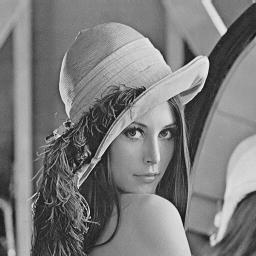

In [2]:
img = cv2.imread('/content/gdrive/My Drive/ColabIP/Images/lena256.jpg')
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

gimg1 = cv2.cvtColor(RGB_img, cv2.COLOR_RGB2GRAY)
print(gimg1.shape)
cv2_imshow(gimg1)
#plt.imshow(gimg1, cmap='gray')

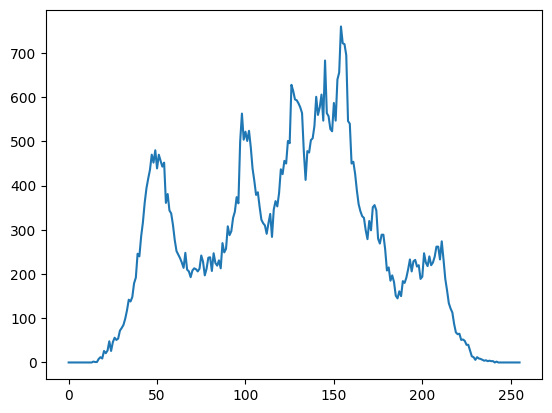

In [6]:
hist = cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)
# 레나 이미지의 히스토그램 출력

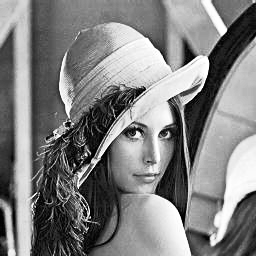

In [4]:
gOut = cv2.equalizeHist(gimg1)
cv2_imshow(gOut)
# 라이브러리 통한 평활화

(256, 1)


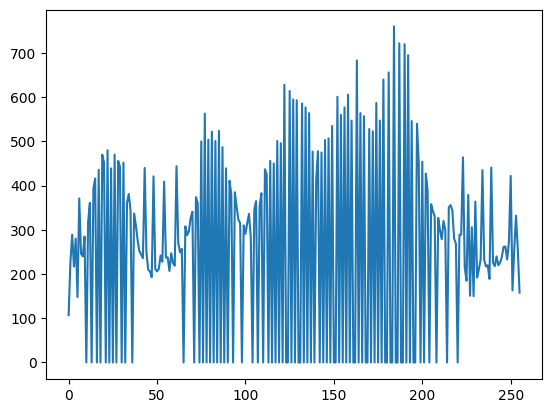

In [7]:
hist = cv2.calcHist([gOut], [0], None, [256], [0,256])
plt.plot(hist)
print(hist.shape)

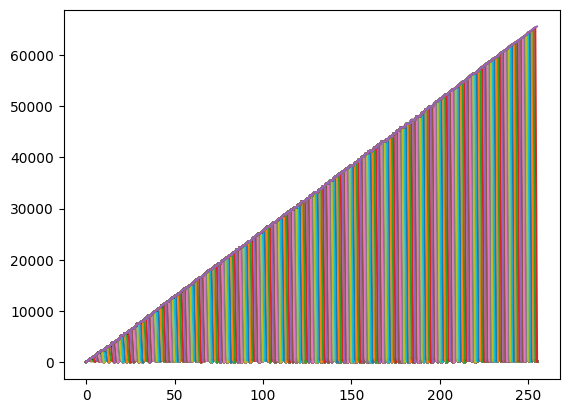

In [9]:
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

  plt.plot(cumulHist)


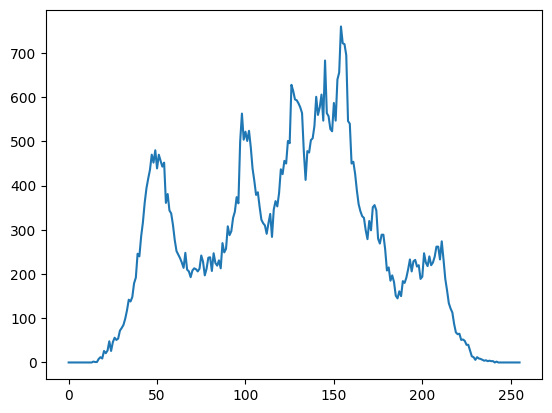

In [10]:
# 라이브러리가 아닌 직접 작성해 구현
hist = cv2.calcHist([gimg1], [0], None, [256], [0,256])
plt.plot(hist)

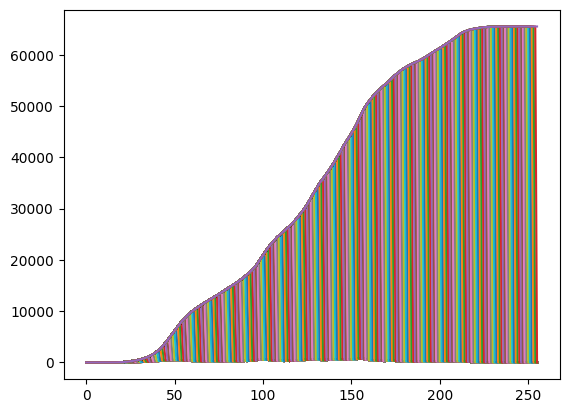

In [11]:
# 256 x 256 즉, y값은 화소의 개수이다 . 지금은 첫단계인 히스토그램의 개수를 구했다.
cumulHist = hist.copy()

for i in range(1, 256):
  cumulHist[i] = cumulHist[i-1] + hist[i]

  plt.plot(cumulHist)


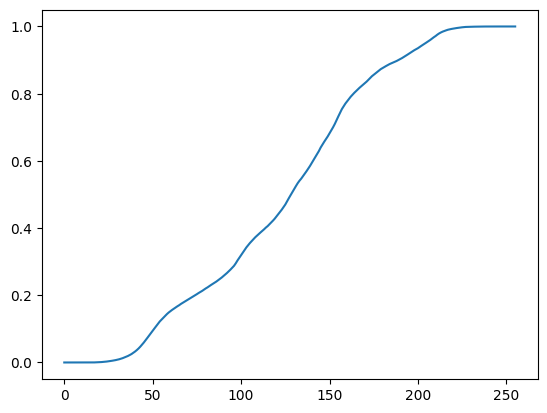

In [13]:
# 누적 히스토 그램을 개수로 나누는 과정
equalHist = cumulHist.copy()
numOfPixels = np.int32(gimg1.shape[0] * gimg1.shape[1])
equalHist = equalHist/numOfPixels  // 전체 화소 개수로 나누기

plt.plot(equalHist)

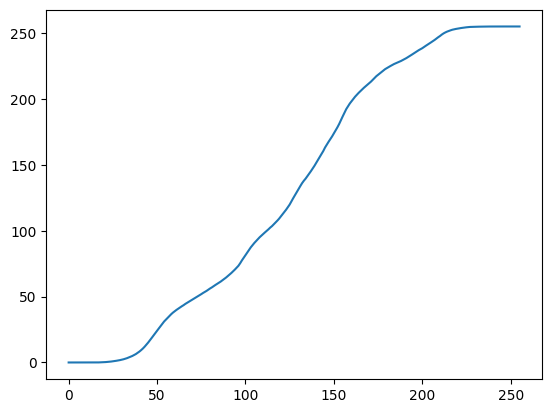

In [14]:
equalHist = equalHist * 255
plt.plot(equalHist)
# 이렇게 구한 값이 평활화 함수



<ipython-input-15-401ac4e22c17>:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gOut[h,w] = equalHist[gimg1[h,w]]


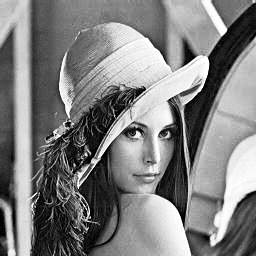

In [15]:
# 결과 영상 출력하기
gOut = gimg1.copy()

for h in range(gimg1.shape[0]):
  for w in range(gimg1.shape[1]):
    gOut[h,w] = equalHist[gimg1[h,w]]

cv2_imshow(gOut)
